In [1]:
library(data.table)
library(dplyr)
library(redeemR)
library(stringr)
library(BuenColors)
library(ggtree)
library(ape)
library(phangorn)
library(ggtreeExtra)
source('00_functions.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“replacing previous import ‘ape::where’ by ‘dplyr::where’ when loading ‘redeemR’”
Warning message:
“replacing previous import ‘ape::keep.tip’ by ‘tidytree::keep.tip’ when loading ‘redeemR’”
Warning message:
“replacing previous import ‘ape::drop.tip’ by ‘tidytree::drop.tip’ when loading ‘redeemR’”
Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: ggplot2

ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
g

In [ ]:
base_dir = '/Users/tgao/redeem/'
id = 'Young1.BMMC'

# Script that calls the sensitive variants from the 
# redeem object for ease of use in downstream analyses
WD <- paste0(base_dir, id, ".Consensus.final/") # CL specific working directory

# Import data based on reproducibility notebook
redeemR<-Create_redeemR(redeemR.read(path=WD,thr="S",Processed=T,rdsname = "/new.VariantsGTSummary.RDS"))

In [14]:
samples = c('Old1.BMMC', 'Old2.BMMC', 'Young1.T1.BMMC', 'Young1.T2.BMMC', 'Young2.BMMC')

redeemR = list()
for (sample in samples) {
    message(sample)
    WD <- paste0(base_dir, sample, ".Consensus.final/")
    redeemR[[sample]] <-Create_redeemR(redeemR.read(
        path=WD,thr="S",Processed=T,
        rdsname = "/new.VariantsGTSummary.RDS"))
}

Old1.BMMC



[1] "39881 variants to start"
[1] "38790 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 10398_A_G" "Tag Homoplasmy: 10550_A_G"
 [3] "Tag Homoplasmy: 11299_T_C" "Tag Homoplasmy: 11467_A_G"
 [5] "Tag Homoplasmy: 11485_T_C" "Tag Homoplasmy: 11719_G_A"
 [7] "Tag Homoplasmy: 11840_C_T" "Tag Homoplasmy: 1189_T_C" 
 [9] "Tag Homoplasmy: 12308_A_G" "Tag Homoplasmy: 12372_G_A"
[11] "Tag Homoplasmy: 12957_T_C" "Tag Homoplasmy: 13740_T_C"
[13] "Tag Homoplasmy: 14167_C_T" "Tag Homoplasmy: 1438_A_G" 
[15] "Tag Homoplasmy: 14384_G_A" "Tag Homoplasmy: 14766_C_T"
[17] "Tag Homoplasmy: 14798_T_C" "Tag Homoplasmy: 15326_A_G"
[19] "Tag Homoplasmy: 16224_T_C" "Tag Homoplasmy: 16311_T_C"
[21] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 1811_A_G" 
[23] "Tag Homoplasmy: 195_T_C"   "Tag Homoplasmy: 263_A_G"  
[25] "Tag Homoplasmy: 2706_A_G"  "Tag Homoplasmy: 3480_A_G" 
[27] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 497_C_T"  
[29] "Tag Homoplasmy: 6260_G_A"  "Tag Homoplasmy: 7028_C_T" 
[31

Old2.BMMC



[1] "44087 variants to start"
[1] "43732 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 10463_T_C" "Tag Homoplasmy: 11251_A_G"
 [3] "Tag Homoplasmy: 11719_G_A" "Tag Homoplasmy: 11812_A_G"
 [5] "Tag Homoplasmy: 11914_G_A" "Tag Homoplasmy: 13368_G_A"
 [7] "Tag Homoplasmy: 13711_G_A" "Tag Homoplasmy: 14233_A_G"
 [9] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 14766_C_T"
[11] "Tag Homoplasmy: 14905_G_A" "Tag Homoplasmy: 15326_A_G"
[13] "Tag Homoplasmy: 15452_C_A" "Tag Homoplasmy: 15607_A_G"
[15] "Tag Homoplasmy: 15928_G_A" "Tag Homoplasmy: 16126_T_C"
[17] "Tag Homoplasmy: 16294_C_T" "Tag Homoplasmy: 16325_T_C"
[19] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 1888_G_A" 
[21] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 2706_A_G" 
[23] "Tag Homoplasmy: 3666_G_A"  "Tag Homoplasmy: 4216_T_C" 
[25] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4917_A_G" 
[27] "Tag Homoplasmy: 5333_T_C"  "Tag Homoplasmy: 7028_C_T" 
[29] "Tag Homoplasmy: 7080_T_C"  "Tag Homoplasmy: 709_G_A"  
[31

Young1.T1.BMMC



[1] "41114 variants to start"
[1] "40728 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 11674_C_T" "Tag Homoplasmy: 11719_G_A"
 [3] "Tag Homoplasmy: 11947_A_G" "Tag Homoplasmy: 12414_T_C"
 [5] "Tag Homoplasmy: 1243_T_C"  "Tag Homoplasmy: 12705_C_T"
 [7] "Tag Homoplasmy: 12923_G_T" "Tag Homoplasmy: 1406_T_C" 
 [9] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 14766_C_T"
[11] "Tag Homoplasmy: 15326_A_G" "Tag Homoplasmy: 15884_G_C"
[13] "Tag Homoplasmy: 16223_C_T" "Tag Homoplasmy: 16292_C_T"
[15] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 194_C_T"  
[17] "Tag Homoplasmy: 195_T_C"   "Tag Homoplasmy: 199_T_C"  
[19] "Tag Homoplasmy: 204_T_C"   "Tag Homoplasmy: 207_G_A"  
[21] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 2706_A_G" 
[23] "Tag Homoplasmy: 3505_A_G"  "Tag Homoplasmy: 4769_A_G" 
[25] "Tag Homoplasmy: 5046_G_A"  "Tag Homoplasmy: 5460_G_A" 
[27] "Tag Homoplasmy: 7028_C_T"  "Tag Homoplasmy: 7058_T_C" 
[29] "Tag Homoplasmy: 709_G_A"   "Tag Homoplasmy: 73_A_G"   
[31

Young1.T2.BMMC



[1] "43167 variants to start"
[1] "42711 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 11674_C_T" "Tag Homoplasmy: 11719_G_A"
 [3] "Tag Homoplasmy: 11947_A_G" "Tag Homoplasmy: 12414_T_C"
 [5] "Tag Homoplasmy: 1243_T_C"  "Tag Homoplasmy: 12705_C_T"
 [7] "Tag Homoplasmy: 12923_G_T" "Tag Homoplasmy: 1406_T_C" 
 [9] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 14766_C_T"
[11] "Tag Homoplasmy: 15326_A_G" "Tag Homoplasmy: 15884_G_C"
[13] "Tag Homoplasmy: 16223_C_T" "Tag Homoplasmy: 16292_C_T"
[15] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 194_C_T"  
[17] "Tag Homoplasmy: 195_T_C"   "Tag Homoplasmy: 199_T_C"  
[19] "Tag Homoplasmy: 204_T_C"   "Tag Homoplasmy: 207_G_A"  
[21] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 2706_A_G" 
[23] "Tag Homoplasmy: 3505_A_G"  "Tag Homoplasmy: 4769_A_G" 
[25] "Tag Homoplasmy: 5046_G_A"  "Tag Homoplasmy: 5460_G_A" 
[27] "Tag Homoplasmy: 7028_C_T"  "Tag Homoplasmy: 7058_T_C" 
[29] "Tag Homoplasmy: 709_G_A"   "Tag Homoplasmy: 73_A_G"   
[31

Young2.BMMC



[1] "42762 variants to start"
[1] "42188 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 15326_A_G"
 [3] "Tag Homoplasmy: 16188_C_G" "Tag Homoplasmy: 16519_T_C"
 [5] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 3010_G_A" 
 [7] "Tag Homoplasmy: 4769_A_G"  "Tag Homoplasmy: 4859_T_C" 
 [9] "Tag Homoplasmy: 750_A_G"   "Tag Homoplasmy: 8860_A_G" 
[1] "After filtering, 4097 Variants left"


In [16]:
for (sample in samples) {
  redeemR[[sample]]@GTsummary.filtered %>% pull(hetero) %>% summary %>% print
}

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002645 1.000000 1.000000 0.863462 1.000000 1.000000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001208 0.981818 1.000000 0.785322 1.000000 1.000000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001412 1.000000 1.000000 0.830522 1.000000 1.000000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001608 1.000000 1.000000 0.834590 1.000000 1.000000 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001311 0.055556 1.000000 0.650317 1.000000 1.000000 


In [8]:
redeemR@HomoVariants <- (redeemR@V.fitered %>% filter(totalVAF > 0.35) %>% pull(Variants)) # Variants in Old 2 that are at ~40%

# Append the variants that Chen manually filters out already as homoplasmic
# so they aren't in the matrix
redeemR@HomoVariants <- c(redeemR@HomoVariants, bad_vars_cw)

## Filter low coverage cells and compute adjacency matrix
keep_cells<-subset(redeemR@CellMeta,meanCov>=10)$Cell

# Create matrix using redeem functions
redeemR <- Make_matrix(redeemR)
bad_vars_cw %in% colSums(redeemR@Cts.Mtx.bi) 

## Filter low coverage cells and compute adjacency matrix
BadCells<-subset(redeemR@CellMeta,meanCov<10)$Cell
keep_cells <- !(rownames(redeemR@Cts.Mtx.bi) %in% BadCells)

# now filter out the instances where 
# we only have 1 molecule supporting the interaction
Cts.Mtx.bin1 <- redeemR@Cts.Mtx[keep_cells,]
Cts.Mtx.bin1[Cts.Mtx.bin1>=1]<-1

# number 2 is only 2+ reads
Cts.Mtx.bin2 <- redeemR@Cts.Mtx[keep_cells,]
Cts.Mtx.bin2[Cts.Mtx.bin2 <= 1]<-0
Cts.Mtx.bin2[Cts.Mtx.bin2 >= 2]<-1

# number 3 is only == 1
Cts.Mtx.bin3 <- redeemR@Cts.Mtx[keep_cells,]
Cts.Mtx.bin3[Cts.Mtx.bin3 >= 2]<-0

# function to make the weights for their jaccard thingy
make_weight_df <- function(Cts.bin){
# Pull out weights fromt the data object; update with N/As with 1 as described in manuscript
weightdf<-data.frame(Variants=colnames(Cts.bin)) %>% merge(.,V.weight,by="Variants",all.x = T,sort = F) 
weight <- weightdf %>% pull(weight)
weight[is.na(weight)] <- 1
weight
}

# do the weights
weight1 <- make_weight_df(Cts.Mtx.bin1)
weight2 <- make_weight_df(Cts.Mtx.bin2)
weight3 <- make_weight_df(Cts.Mtx.bin3)

# Compute weighted jaccard distance metric in the paper
w_j1 <- quick_w_jaccard_cl(Cts.Mtx.bin1,weight1) %>% data.matrix()
w_j2 <- quick_w_jaccard_cl(Cts.Mtx.bin2,weight2) %>% data.matrix()
w_j3 <- quick_w_jaccard_cl(Cts.Mtx.bin3,weight3) %>% data.matrix()

Loading required package: Matrix.utils

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


The following object is masked from ‘package:ggtree’:

    expand


Only heteroplasmic mutations are used

@Cts.Mtx and @Cts.Mtx.bi are added



[1] FALSE FALSE FALSE FALSE

This is the important part for variant filtering. Cts.Mtx.bin1 is used to construct original tree. Cts.Mtx.bin2 is for the reduced tree presented in the paper

In [43]:
# now filter out the instances where 
# we only have 1 molecule supporting the interaction
Cts.Mtx.bin1 <- redeemR@Cts.Mtx[keep_cells,]
Cts.Mtx.bin1[Cts.Mtx.bin1>=1]<-1

# number 2 is only 2+ reads
Cts.Mtx.bin2 <- redeemR@Cts.Mtx[keep_cells,]
Cts.Mtx.bin2[Cts.Mtx.bin2 <= 1]<-0
Cts.Mtx.bin2[Cts.Mtx.bin2 >= 2]<-1

Most mutation-cell connections are supported by 1 molecule

In [57]:
sum(redeemR@Cts.Mtx == 1)
sum(redeemR@Cts.Mtx == 2)
sum(redeemR@Cts.Mtx >= 3)

[1] 34295

[1] 2708

[1] 8478

However note that all mutations in the original matrix have more than two supporting molecules in at least one cell

In [21]:
mean(apply(redeemR@Cts.Mtx, 2, max) >= 2)

[1] 1

Notice that all mutations still appear in at least one cell after filtering! They didn't get removed overall just no longer appear in cells where there's only 1 molecule supporting the presence of the mutation

In [42]:
dim(Cts.Mtx.bin1)
dim(Cts.Mtx.bin2)
sum(colSums(Cts.Mtx.bin1) >= 1)
sum(colSums(Cts.Mtx.bin2) >= 1)

[1] 7382 4971

[1] 7382 4971

[1] 4971

[1] 4971

After removing all mutation-cell entry with 1 molecule, 2000 cells have 0 mutation

In [25]:
rowSums(Cts.Mtx.bin1) %>% table
rowSums(Cts.Mtx.bin2) %>% table

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 540  837 1003  946  795  746  524  424  308  253  199  146  113   96   88   58 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  51   52   33   33   22   18   20   15    8   10    9    6    6    7    3    2 
  33   34   37   38   39   40   43   49   59   67 
   1    1    1    1    1    2    1    1    1    1 

.
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   15   17 
2174 2304 1414  739  373  186   85   43   27   15    9    7    2    1    1    2 

Also after filtering 2700 mutations are private to only one cell (not lineage informative)

In [33]:
colSums(Cts.Mtx.bin1) %>% table
colSums(Cts.Mtx.bin2) %>% table

.
  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
497 587 594 544 489 399 302 272 205 160 126 101  81  62  55  57  39  29  35  23 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
 19  22  20  14  17  10  10   7  17  12   4   7   9   9   8   4   7   6   4   3 
 42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63 
  1   7   3   4   6   5   3   3   1   2   2   3   3   2   2   2   4   2   1   1 
 64  65  66  67  68  69  70  71  72  73  74  75  80  81  82  83  85  87  89  90 
  1   2   1   1   1   1   2   1   1   3   1   1   2   2   1   1   2   1   1   1 
 91  93  95  96 104 111 113 115 117 122 130 146 157 205 235 244 281 317 
  1   1   1   1   2   1   3   1   1   1   1   1   1   1   1   1   1   1 

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2786 1103  488  238  113   73   38   28   21   11    5    7    9    6    4    4 
  17   18   19   20   21   22   24   26   27   28   29   30   31   35   36   40 
   4    2    1    1    1    3    1    2    2    2    2    1    1    3    1    1 
  42   47   49   72   75   79  129  154  159 
   1    1    1    1    1    1    1    1    1 

So of course the phylogenies collapse

In [51]:
# Make phylogenetic tree
phylo1 <- nj(w_j1)
message('tree1')
phylo2 <- nj(w_j2)
message('tree2')

save(phylo1, phylo2, file = paste0("../output/trees_partition/trees_all_1_2p_mod_", id, ".rda"))

tree1

tree2



Replot the trees in different ways to see what's going on

In [35]:
load(paste0("../output/trees_partition/trees_all_1_2p_", id, ".rda"))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


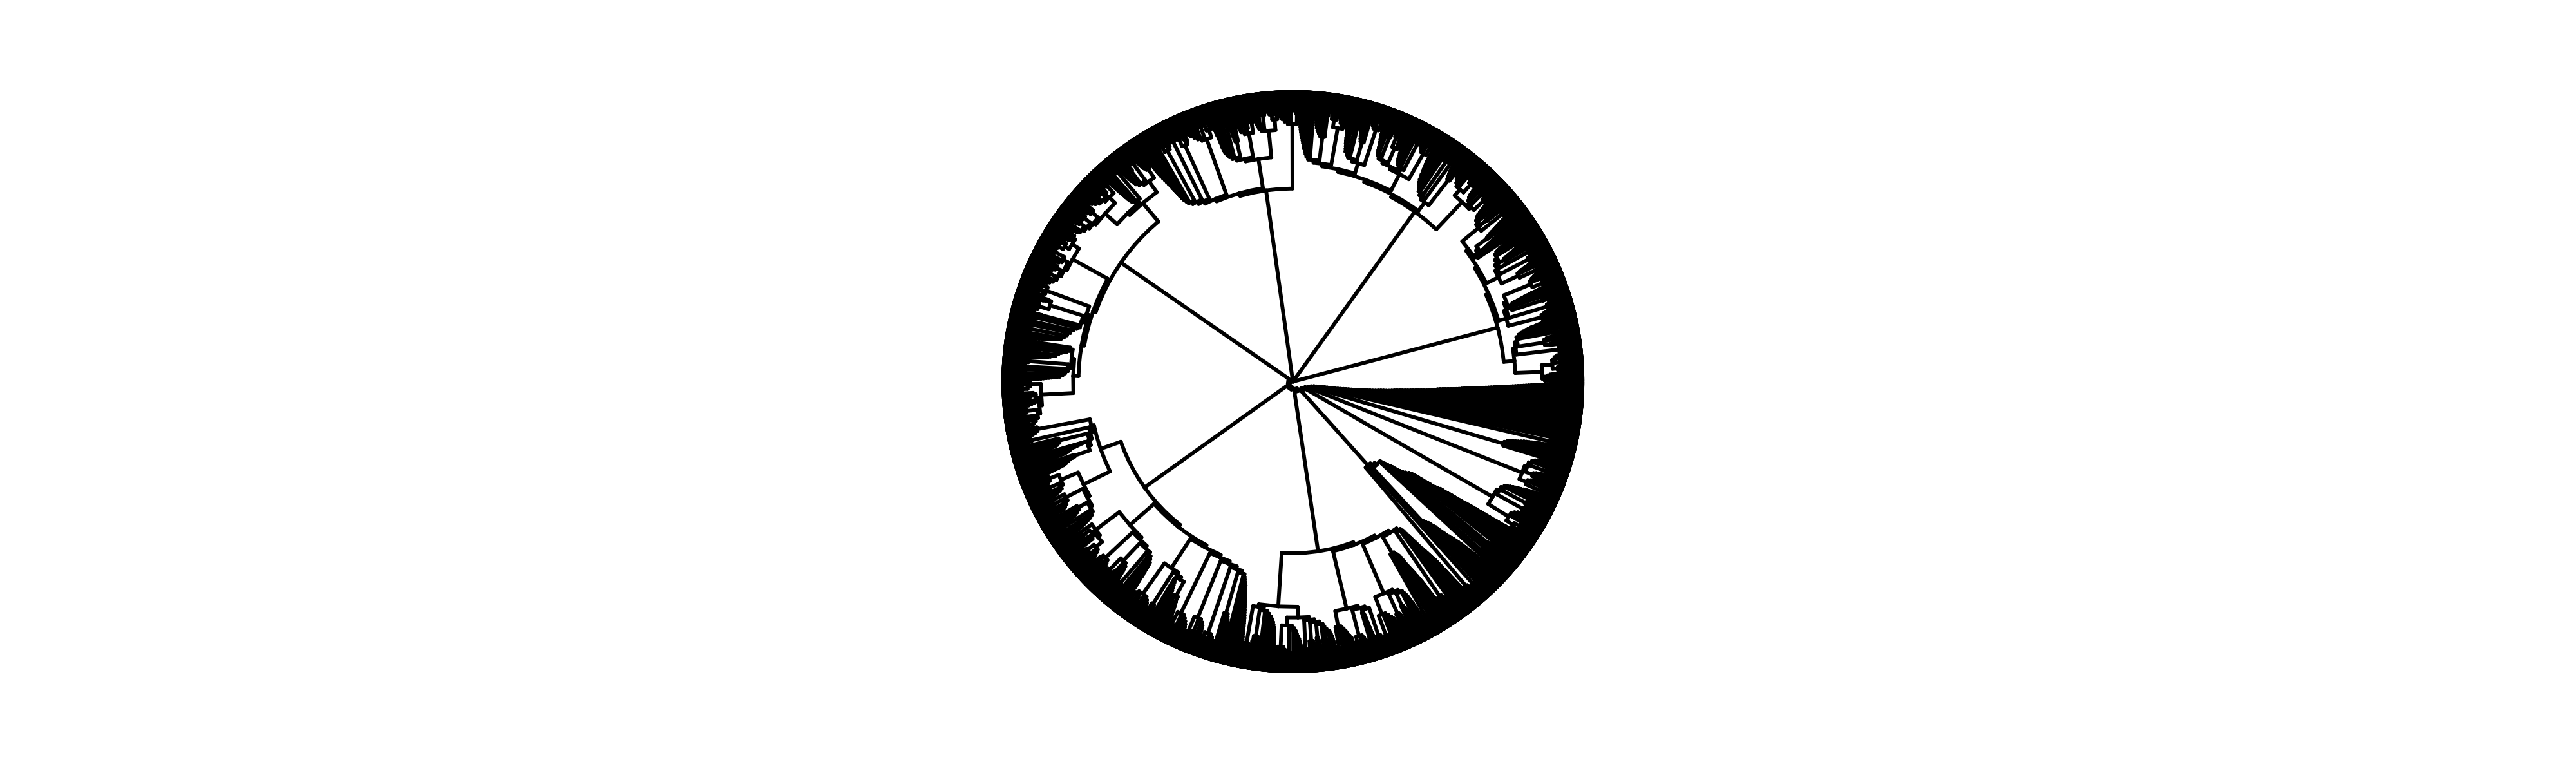

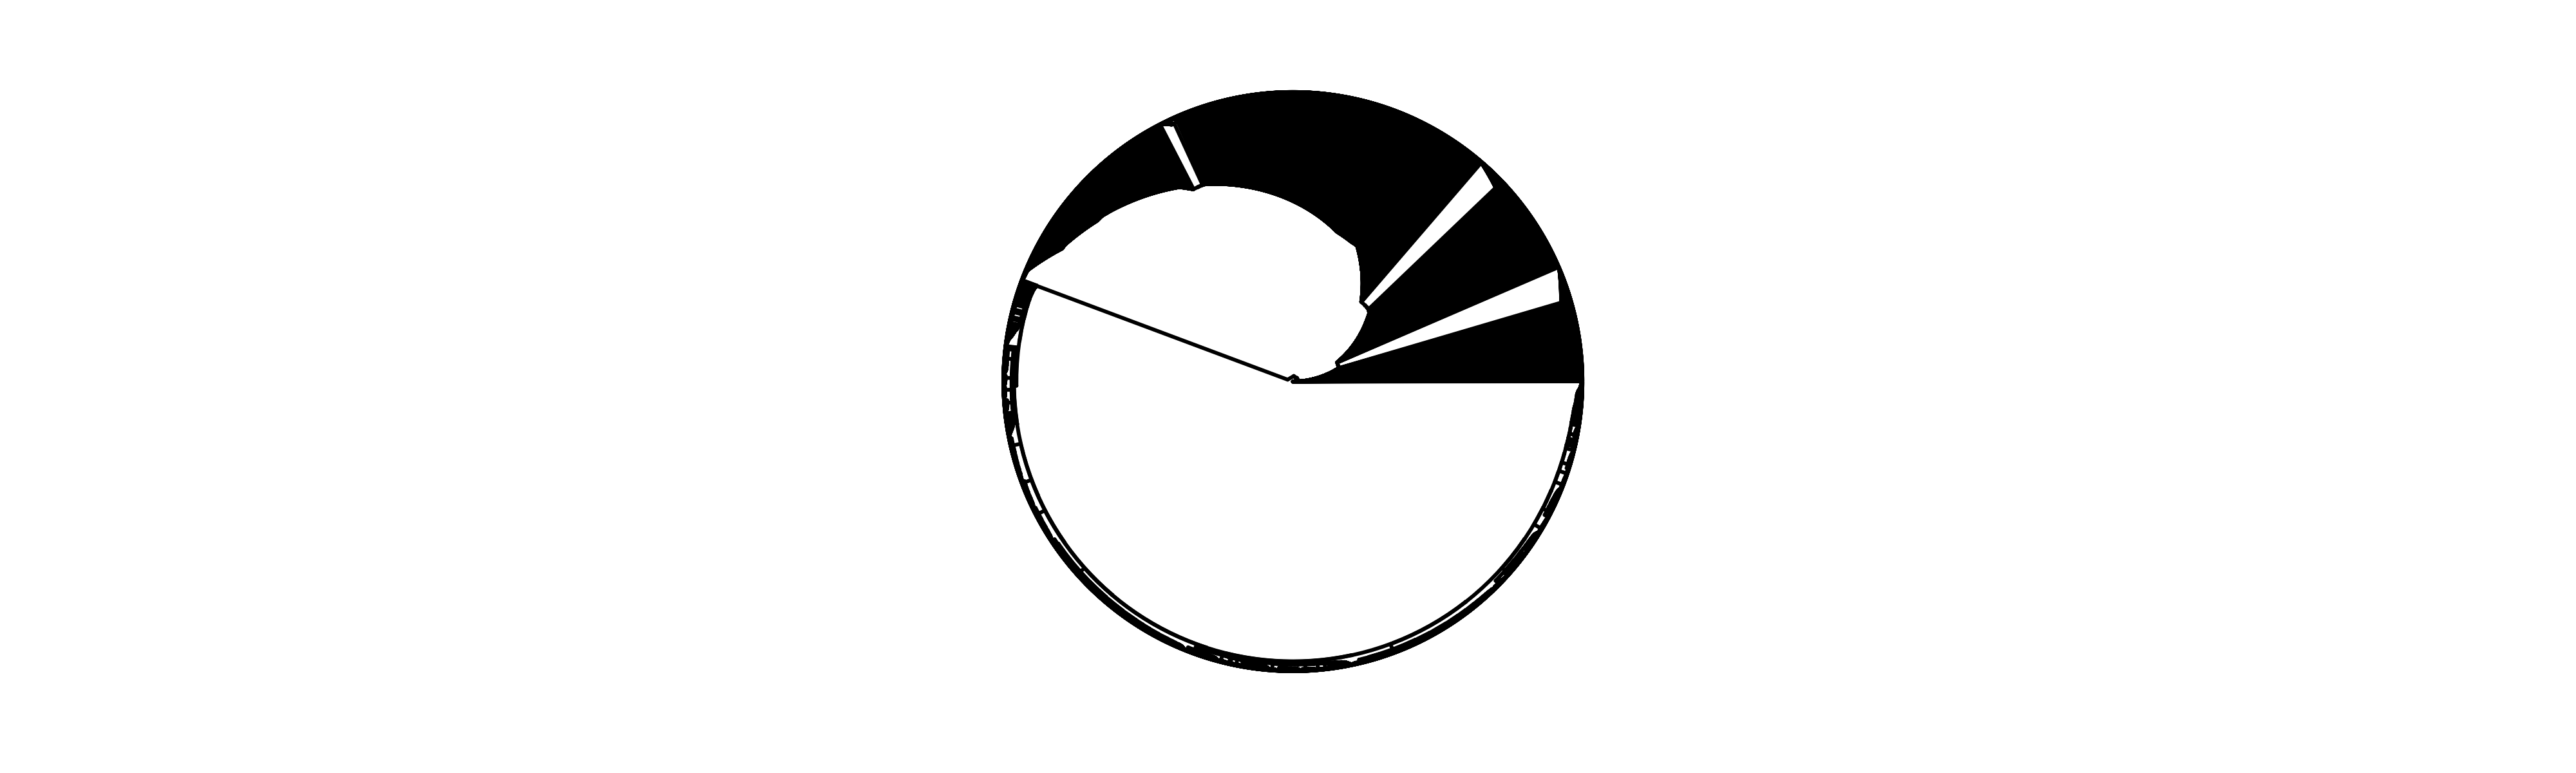

In [38]:
ggtree(phylo1,layout="fan", branch.length = 'none')
ggtree(phylo2,layout="fan", branch.length = 'none')

Cells with 0 mutations are on the upper part of the tree

In [69]:
cells_0 = names(which(rowSums(Cts.Mtx.bin2) == 0))
p_tree = ggtree(phylo2,layout="dendrogram", linewidth = 0.1)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


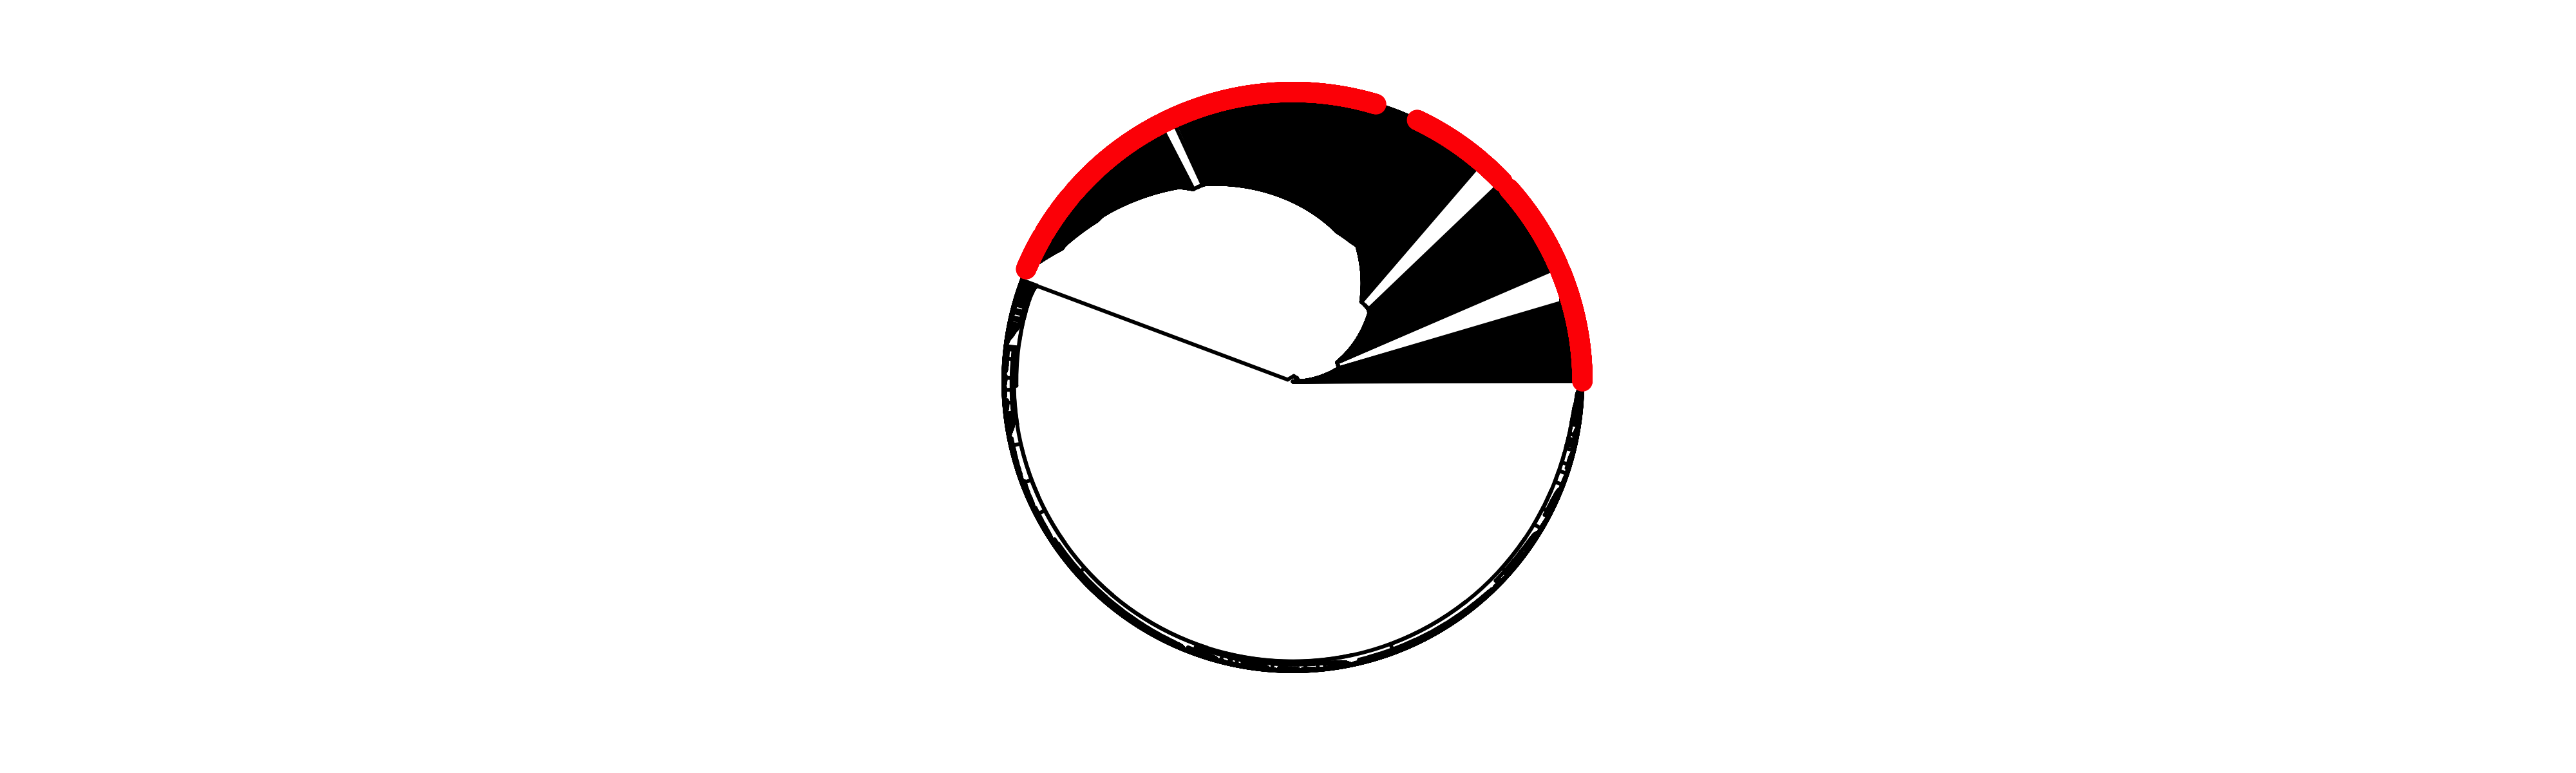

In [74]:
ggtree(phylo2,layout="fan", branch.length = 'none') +
geom_tippoint(mapping=aes(subset = label %in% cells_0), size = 2, color = 'red')

! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.

! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.



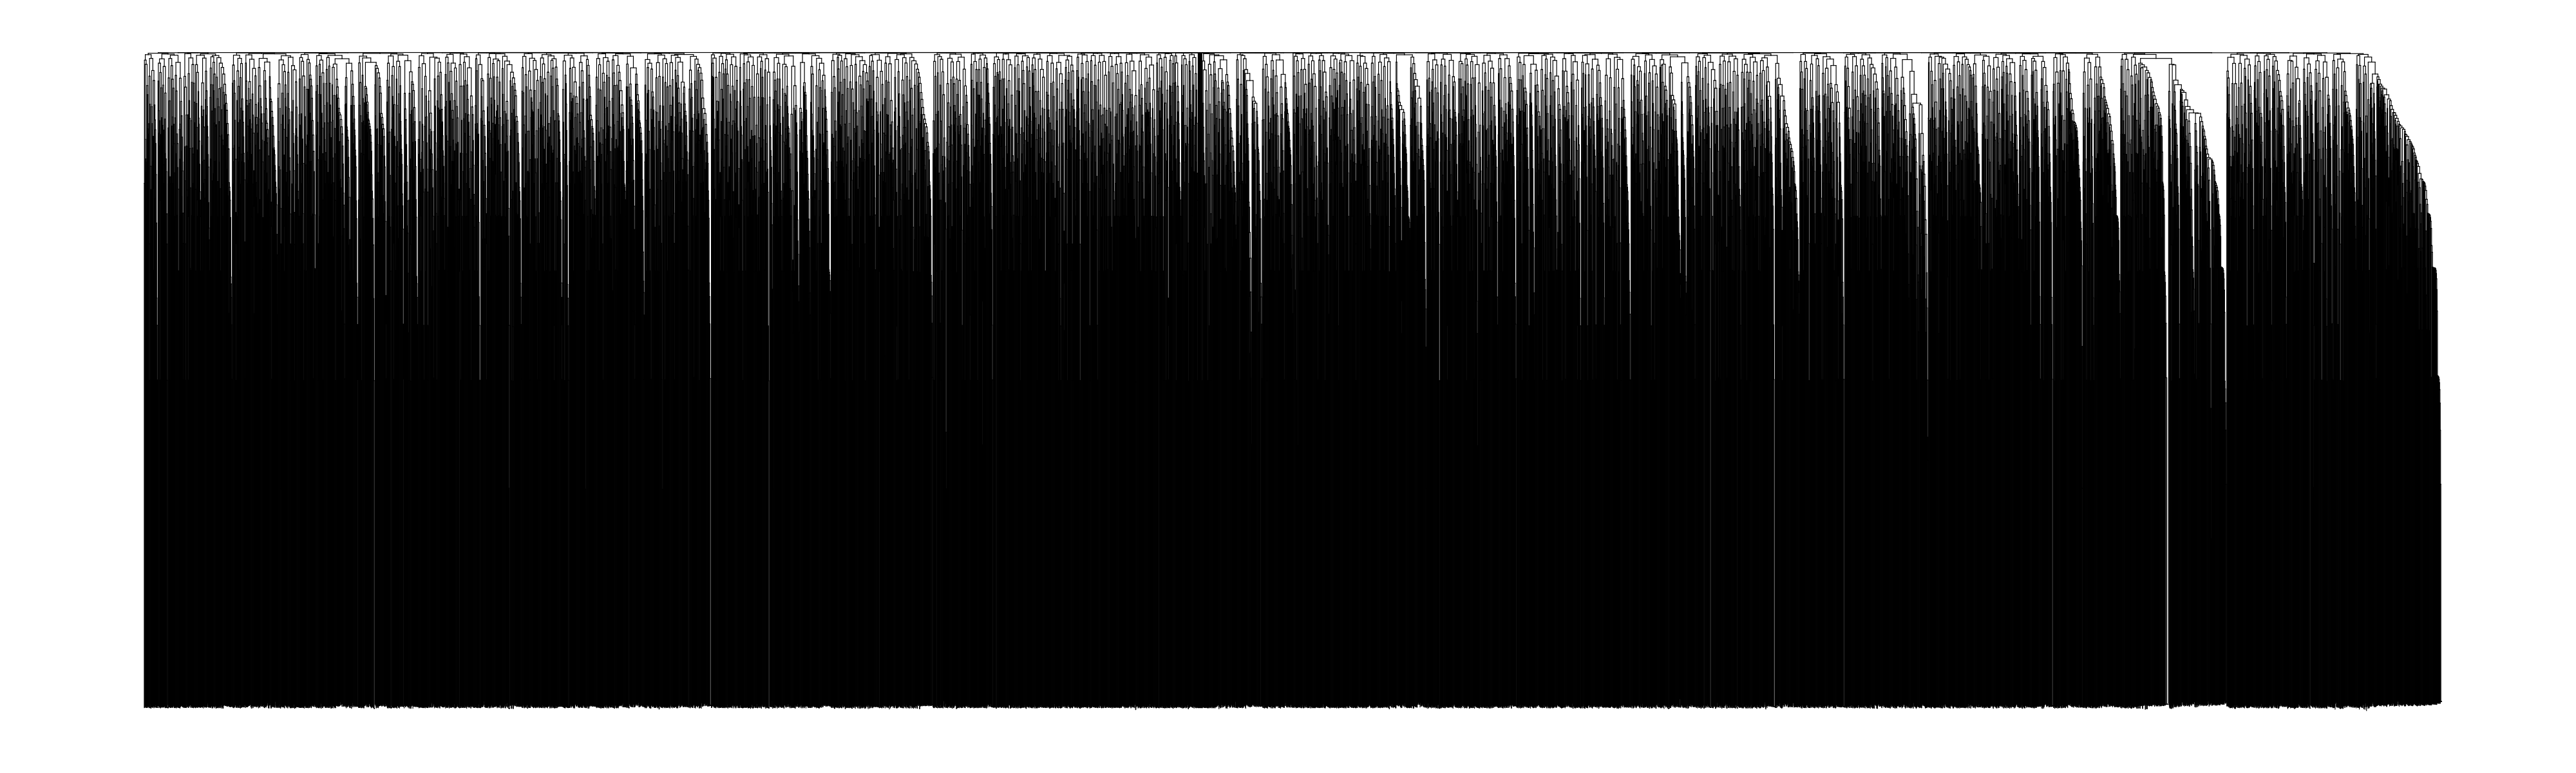

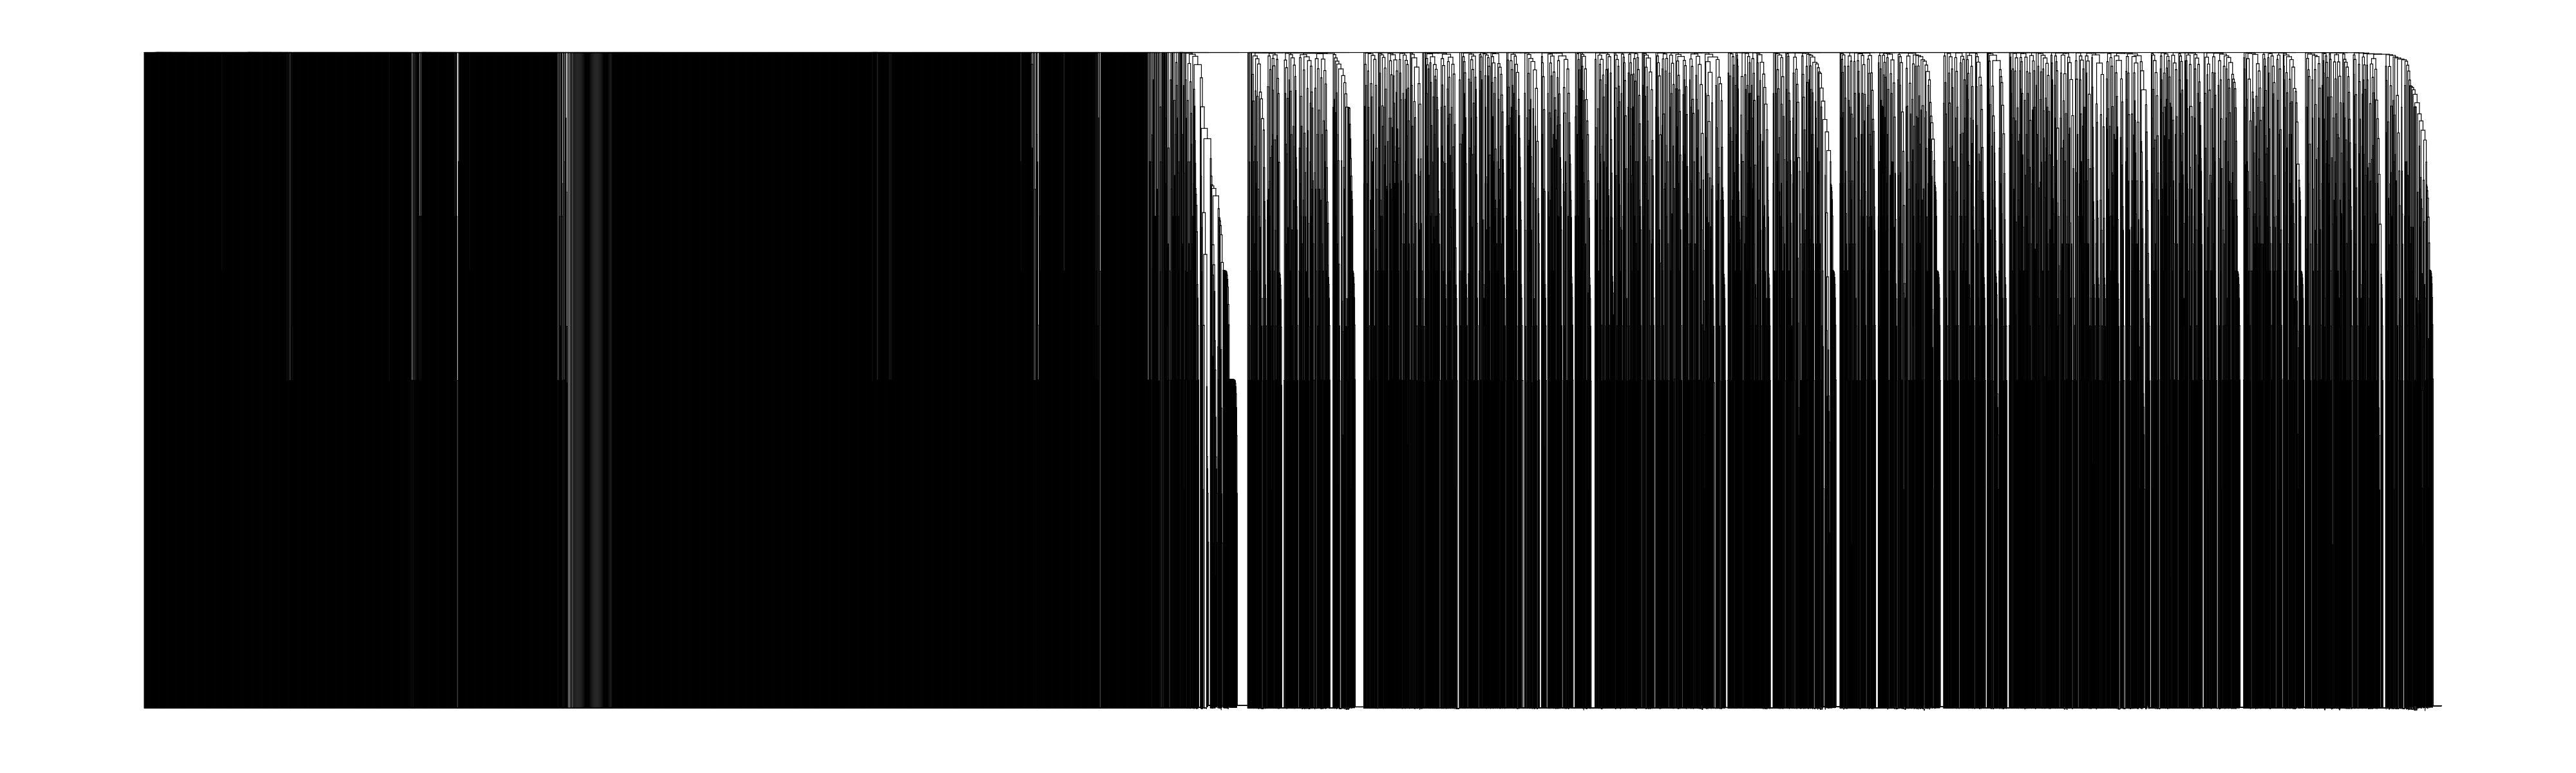

In [36]:
options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 400)

ggtree(phylo1,layout="dendrogram", linewidth = 0.1)
ggtree(phylo2,layout="dendrogram", linewidth = 0.1)

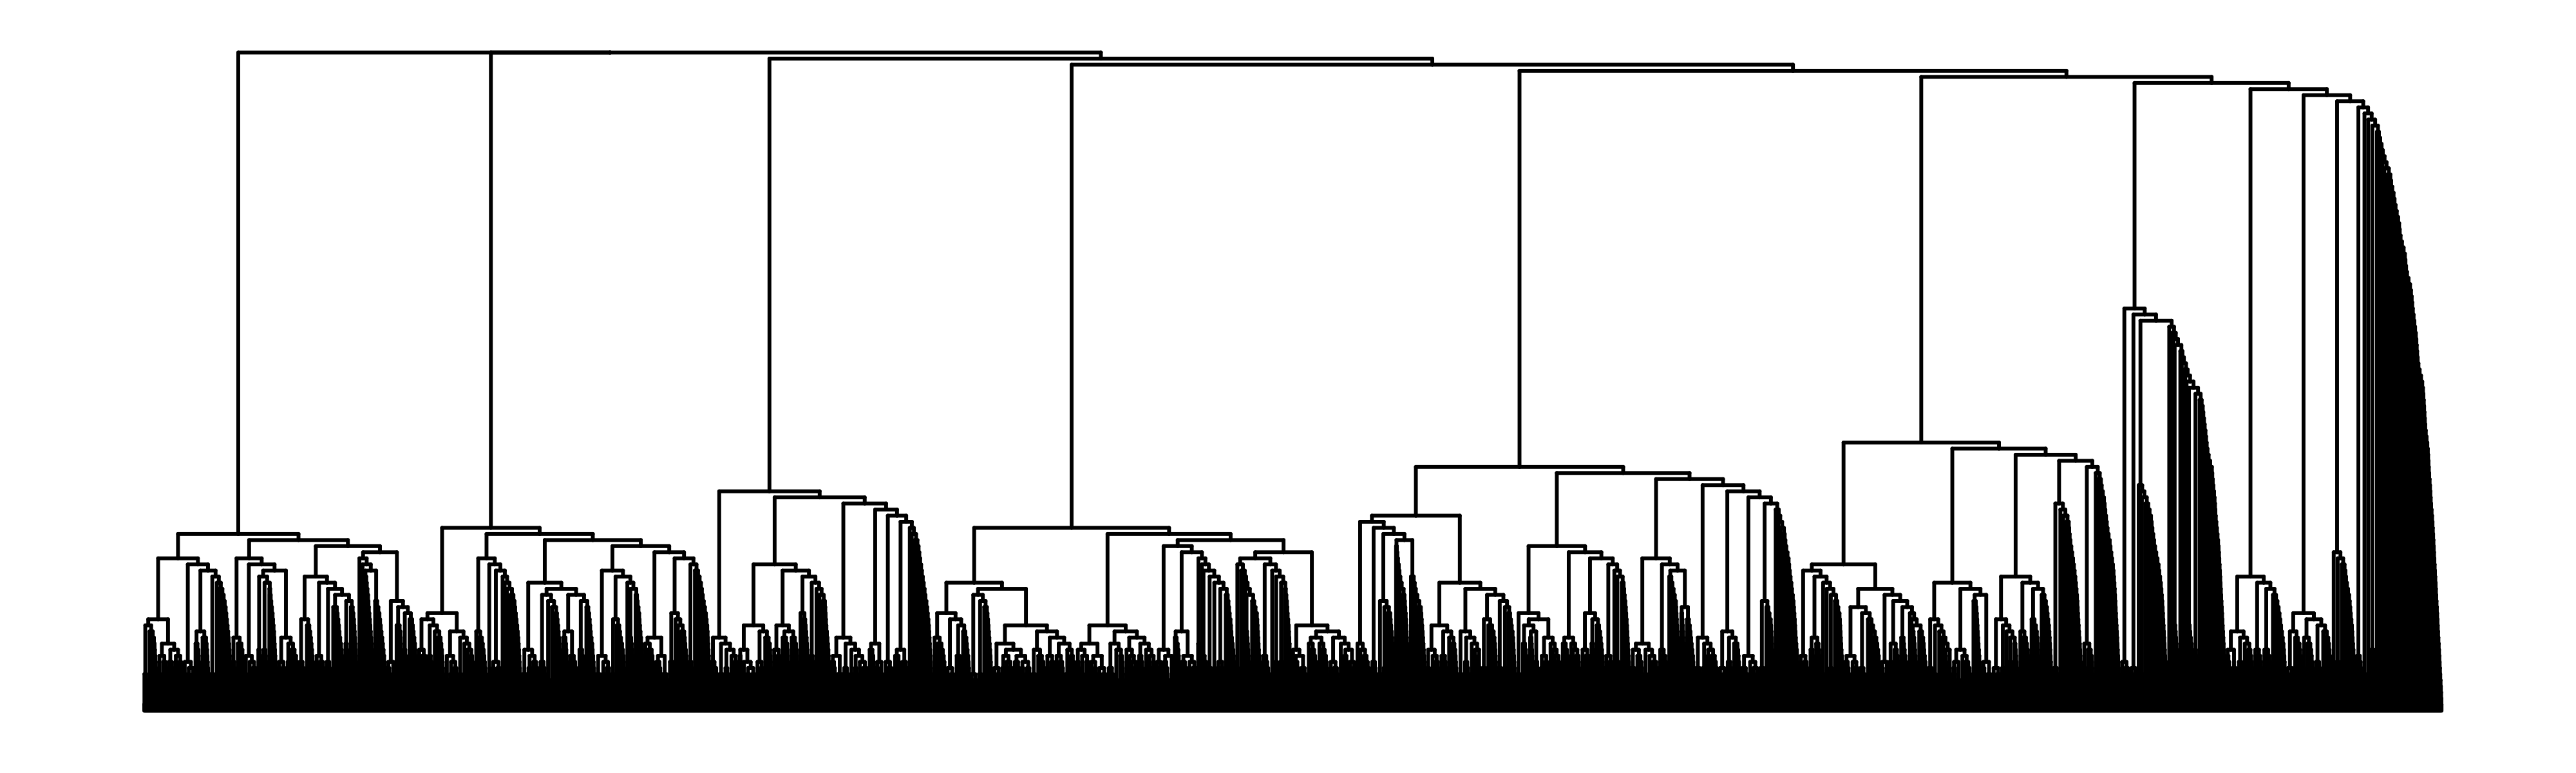

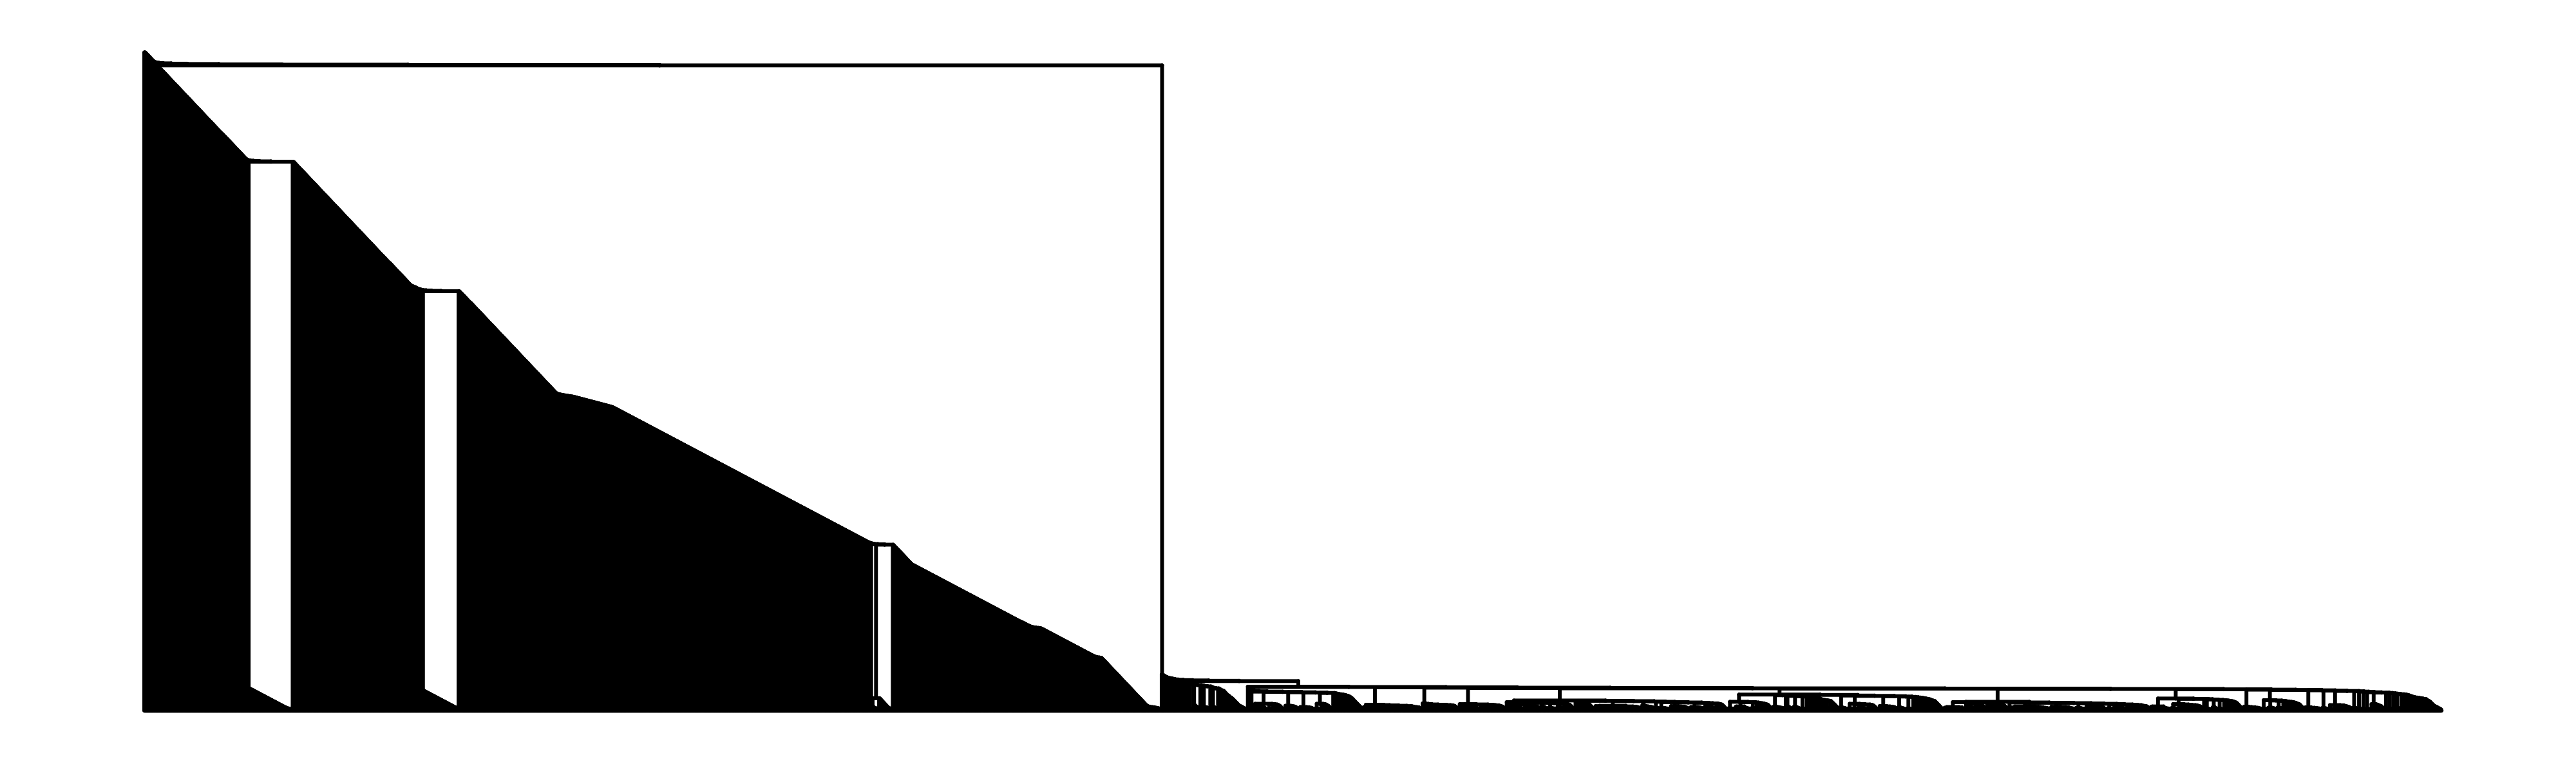

In [37]:
ggtree(phylo1,layout="dendrogram", branch.length = 'none')
ggtree(phylo2,layout="dendrogram", branch.length = 'none')